### Breast Cancer Analysis and Prediction

#### Introduction
Breast cancer is the most common invasive cancer in women and the second leading cause of cancer
death in women after lung cancer. Advances in screening and treatment for breast cancer have
improved survival rates dramatically since 1989. Early screening, leading to detection has, from
statistics, led to the increase in survival rates.

There is a possibility of detecting cancer at an early stage, based on features collected from the patients.

Features of the cell from various patients are computed from a digitized image of a fine needle aspirate
(FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1,
1992, 23-34].

##### Aim:
Observe which features are more helpful in predicticting Malignant (Has the potential to be dangerous) and Benign (Not dandgerous to health) Cancer.

Analyse the data and build a model that would detect cancerous cells with good accuracy. 


In [15]:
#Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#### Step 1: Data Exploration

In [16]:
#Import the cancer dataset
dataset = pd.read_csv('data.csv')
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [17]:
#Drop the last column
dataset.drop(columns = ['Unnamed: 32'], axis=1, inplace=True)

In [18]:
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [19]:
#Find the dimensions of the dataset
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


From this, we can see that the data set contains 569 rows and 32 columns. 

The column we are going to predict is ‘Diagnosis’, it states if the cell is M = malignant or B = benign. 

In [20]:
#Find any missing or null data points of the dataset
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [21]:
#Remove any column with empty input
dataset.dropna(inplace = True)

In [22]:
#Check the shape of the dataset
dataset.shape

(569, 32)

In [23]:
#Count the number of patients with malignant and benign cells
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

This shows you that the number of patients with Benign cells are: 357 and the number of patients with malignant cells are: 212
        
The next thing we would do is to:
#### Visualize the count

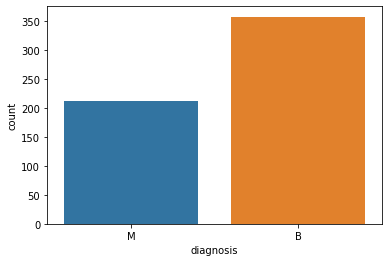

In [24]:
sns.countplot(dataset['diagnosis'], label = 'count')

#### Step 2: Encode The Categorical Data

Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.

In [25]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

#set the ID column to be the index of the dataset
dataset = dataset.set_index('id')

In [26]:
dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           1        17.99         10.38          122.80     1001.0   
842517           1        20.57         17.77          132.90     1326.0   
84300903         1        19.69         21.25          130.00     1203.0   
84348301         1        11.42         20.38           77.58      386.1   
84358402         1        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

#### Step 3: Drop the 'Diagnosis' column

In [27]:
#focus ('diagnosis') is our test (prediction) file, because it contains the malignant/ benign cells data
focus = dataset['diagnosis'].values

#After naming our 'focus', we drop that column so as to ensure that our test and train features are seperated
dataset.drop(columns = ['diagnosis'], inplace = True)

In [28]:
#Check the shape of our test
focus.shape

(569,)

In [29]:
#Check if changes have been effected.
dataset.head()

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id                                                                    ...   
842302                0.14710         0.2419                 0.07871  ...   
842517                0.07017         0.1812                 0.05667  ...   
84300903              0.12790         0.2069                 0.05999  ...   
84348301              0.10520         0.2597                 0.09744  ...   
84358402              0.10430         0.1809                 0.05883  ...   

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
842302           25.38          17.33           184.60      2019.0   
842517           24.99          23.41           158.80      1956.0   
84300903         23.57          25.53           152.50      1709.0   
84348301         14.91          26.50            98.87       567.7   
84358402         22.54          16.67           152.20      1575.0   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
842302              0.1622             0.6656           0.7119   
842517              0.1238             0.1866           0.2416   
84300903            0.1444             0.4245           0.4504   
84348301            0.2098             0.8663           0.6869   
84358402            0.1374             0.2050           0.4000   

          concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

#### Step 4: Getting the Correlation of the Columns

In [30]:
#check the correlations between the attributes
dataset.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

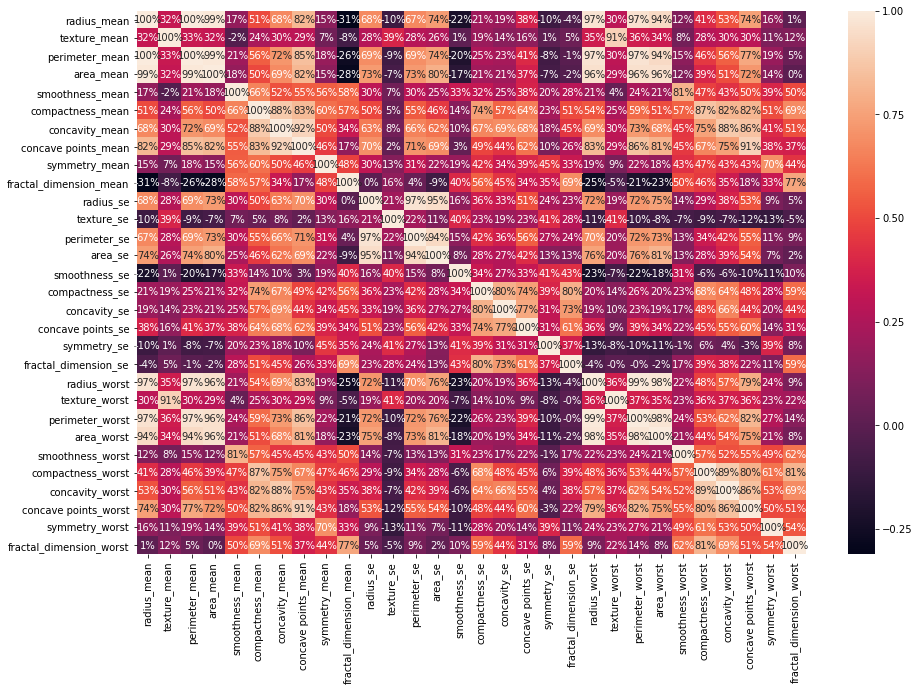

In [31]:
#Visualize the correlation between the attributes

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')

Visualising the data using density plots to get a sense of the data distribution.

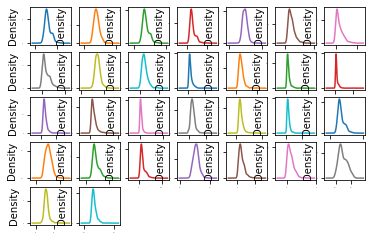

In [32]:
dataset.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

#### Step 4: Splitting the dataset in training set and testing set.

Split into 80% training and 20% testing data sets.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (dataset, focus, test_size = 0.20, random_state=21)

#### Step 5: Scaling the data
Scale the data to bring all features to the same level of magnitude, which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Step 6: Fitting Model into Different Classifiers
This is the Algorithm selection step for Predicting the best result

In [35]:
# Using Logistic Regression

def models (X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 21)
    log.fit(X_train, y_train)
    
    #print model accuracy on the training data.
    print('[1]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    
    return log

In [36]:
#Create the model and look at the accuracy score on the training data to classify if the cell is cancerous or not
model = models(X_train,y_train)

C:\Users\chidi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1]Logistic Regression Training Accuracy: 0.989010989010989


In [37]:
model = models (X_test, y_test)

[1]Logistic Regression Training Accuracy: 1.0


C:\Users\chidi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# Using KNeighbors Classifier 

def models (X_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    #print model accuracy on the training data.
    print('[2]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    
    return knn

In [39]:
#Create the model and look at the accuracy score on the training data to classify if the cell is cancerous or not
model = models(X_train,y_train)

[2]K Nearest Neighbor Training Accuracy: 0.9736263736263736


In [40]:
model = models (X_test, y_test)

[2]K Nearest Neighbor Training Accuracy: 0.9912280701754386


In [41]:
#Using SVC linear Classifier

def models (X_train, y_train):
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 21)
    svc_lin.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[3]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    
    return svc_lin

In [42]:
#Create the model and look at the accuracy score on the training data to classify if the cell is cancerous or not
model = models(X_train,y_train)

[3]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869


In [43]:
model = models (X_test, y_test)

[3]Support Vector Machine (Linear Classifier) Training Accuracy: 1.0


In [44]:
#Using SVC rbf Classifier

def models (X_train, y_train):
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 21)
    svc_rbf.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[4]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    
    return svc_rbf

In [45]:
#Create the model and look at the accuracy score on the training data to classify if the cell is cancerous or not
model = models(X_train,y_train)

[4]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9824175824175824


In [46]:
model = models (X_test, y_test)

[4]Support Vector Machine (RBF Classifier) Training Accuracy: 1.0


C:\Users\chidi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
#Using GaussianNB Classifier

def models (X_train, y_train):
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[5]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    
    return gauss

In [48]:
#Create the model and look at the accuracy score on the training data to classify if the cell is cancerous or not
model = models(X_train,y_train)

[5]Gaussian Naive Bayes Training Accuracy: 0.9362637362637363


In [49]:
model = models (X_test, y_test)

[5]Gaussian Naive Bayes Training Accuracy: 0.956140350877193


In [50]:
#Using DecisionTreeClassifier 

def models (X_train, y_train):
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 21)
    tree.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[6]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    
    return tree

In [51]:
#Create the model and look at the accuracy score on the training data to classify if the cell is cancerous or not
model = models(X_train,y_train)

[6]Decision Tree Classifier Training Accuracy: 1.0


In [52]:
model = models (X_test, y_test)

[6]Decision Tree Classifier Training Accuracy: 1.0


In [53]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

def models (X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 21)
    forest.fit(X_train, y_train)
    
    #print model accuracy on the training data 
    print('[7]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    
    return forest

In [54]:
#Create the model and look at the accuracy score on the training data to classify if the cell is cancerous or not
model = models(X_train,y_train)

[7]Random Forest Classifier Training Accuracy: 0.9934065934065934


In [55]:
model = models (X_test, y_test)

[7]Random Forest Classifier Training Accuracy: 1.0


In [56]:
#Using XGBoostClassifier method
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's Classifier Training accuracy is: %3.2f" % (acc_xgb))

XGBoost's Classifier Training accuracy is: 95.61
